In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


# Load csv file

In [2]:
train_csv_path = '/kaggle/input/fashionmnist/fashion-mnist_train.csv'
test_csv_path = '/kaggle/input/fashionmnist/fashion-mnist_test.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# remove first column and convert to numpy array, transform to [0..1]
x_train = train_df.drop(columns=['label']).values / 255
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values / 255
y_test = test_df['label'].values

In [3]:
# Show a sample image

# Show a sample image

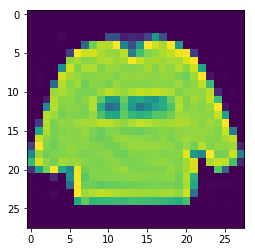

In [4]:
import matplotlib.pyplot as plt

sample_image = x_train[0,:].reshape((28,28))
plt.imshow(sample_image)


# CNN model

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [6]:
image_rows = 28
image_cols = 28
batch_size = 32
image_shape = (image_rows, image_cols, 1)

In [7]:
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [10]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    verbose=0,
)

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)
scores

10000/10000 [==============================] - 1s 51us/step


[0.312974951723218, 0.9159]

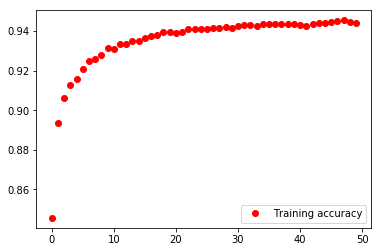

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
acc = history.history['acc']
epoches = range(len(acc))

plt.plot(epoches, acc, 'ro', label='Training accuracy')
plt.legend()
plt.show()